In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
import sidetable
import missingno as msno
from ipywidgets import interact, widgets
#divisão da base de dados
from sklearn.model_selection import train_test_split

#tratamento dos dados categóricos e numéricos
from sklearn.preprocessing import MinMaxScaler

#classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

In [47]:
# Função para carregar CSV e XLS da Pasta:

Churn = pd.read_csv("Z:/01. PESSOAL/BRUNO/VScode/Case Churn/BankChurners.csv")
metadados = pd.read_excel("Z:/01. PESSOAL/BRUNO/VScode/Case Churn/metadados.xlsx")

print("Dados de Churn:", Churn.shape)
Churn.info()
print("\nDados de Meta Dados:")
metadados.info()

Dados de Churn: (10127, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                               

In [48]:
#Verificando estatisticas descritivas

Churn.describe()



,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [49]:
# =====================================
# Etapa 02) Tratamento dos Dados
# =====================================

# Remover colunas desnecessárias (como predições de modelo prévio embutidas)
Churn.drop(Churn.columns[Churn.columns.str.startswith("Naive_Bayes")], axis=1, inplace=True)

# Verificar tipos de dados
print(Churn.info())

# Verificar duplicados
print("Duplicados:", Churn.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# =====================================
# Etapa 03) Limpeza dos Dados
# =====================================

# Valores ausentes
print(Churn.isnull().sum())

# Excluir colunas de ID e irrelevantes
Churn.drop(columns=['CLIENTNUM'], inplace=True)



CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
Valores únicos por coluna:
Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Customer_Age: [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Gender: ['M' 'F']
Dependent_count: [3 5 4 2 0 1]
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'Coll

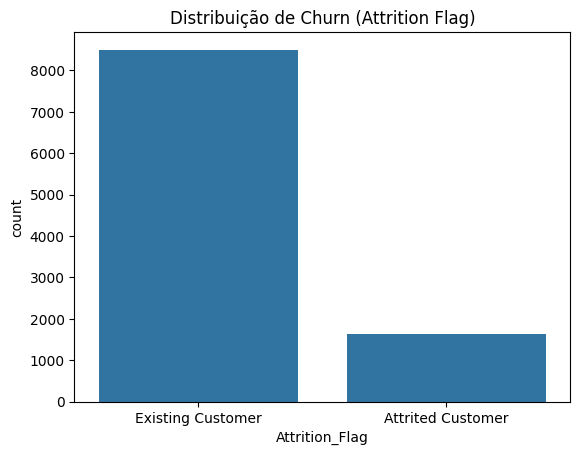

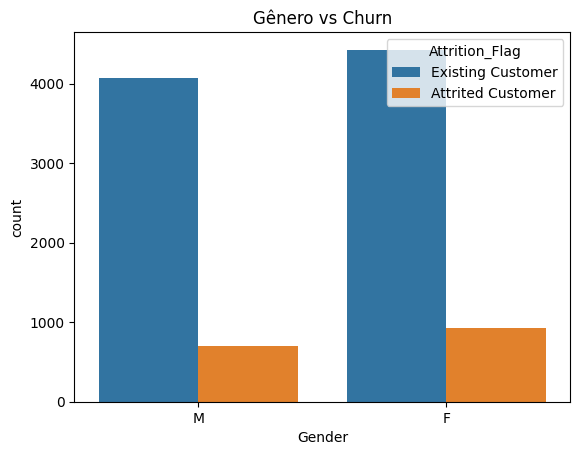

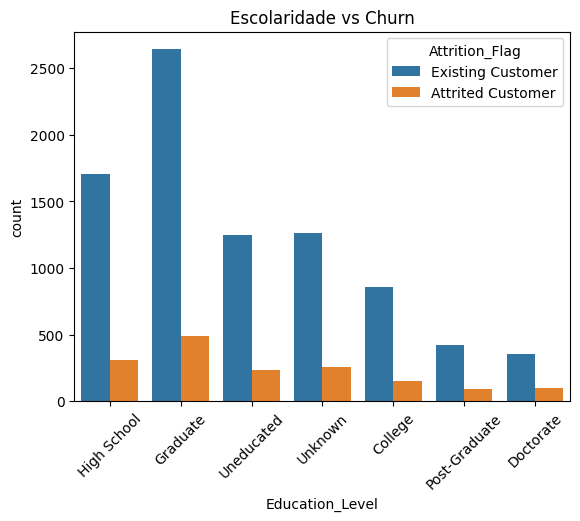

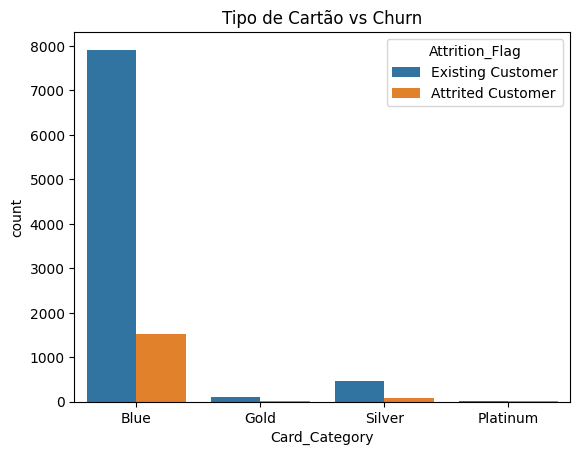

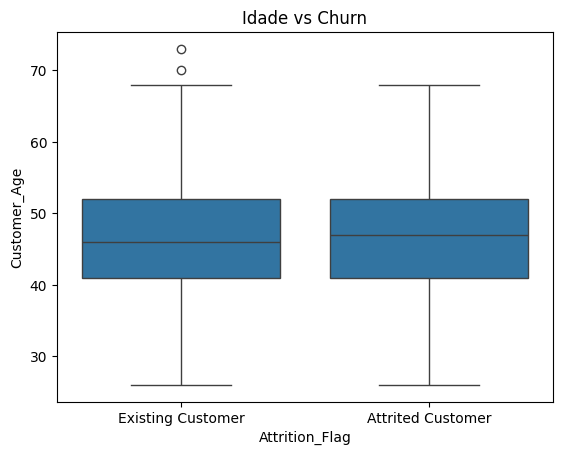

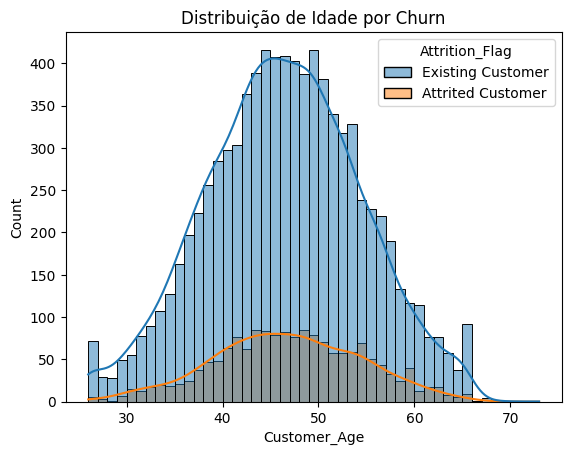

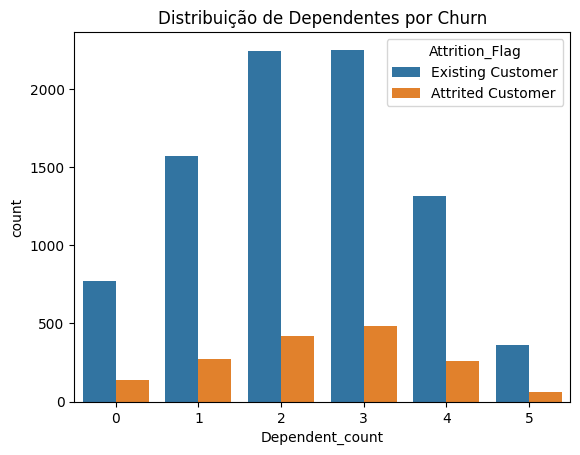

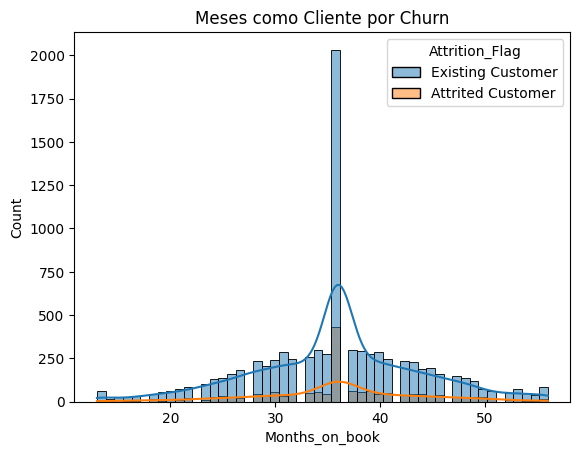

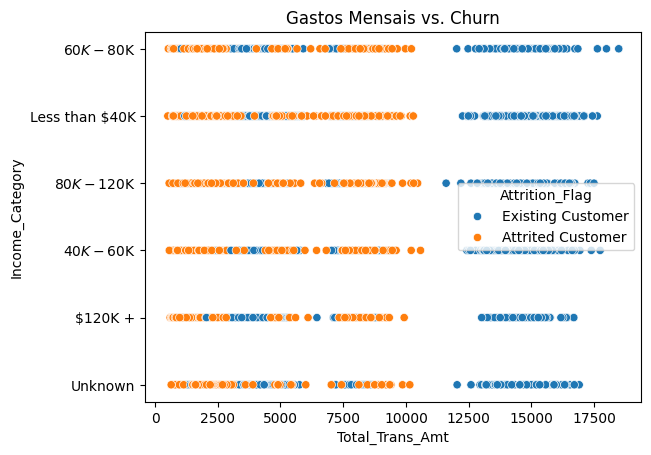

In [51]:
# =====================================
# Etapa 04) Análise Exploratória de Dados (EDA)
# =====================================

# Distribuição do churn
sns.countplot(x="Attrition_Flag", data=Churn)
plt.title("Distribuição de Churn (Attrition Flag)")
plt.show()

# Gênero
sns.countplot(x="Gender", hue="Attrition_Flag", data=Churn)
plt.title("Gênero vs Churn")
plt.show()

# Escolaridade
sns.countplot(x="Education_Level", hue="Attrition_Flag", data=Churn)
plt.title("Escolaridade vs Churn")
plt.xticks(rotation=45)
plt.show()

# Cartão
sns.countplot(x="Card_Category", hue="Attrition_Flag", data=Churn)
plt.title("Tipo de Cartão vs Churn")
plt.show()

# Salário
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=Churn)
plt.title("Idade vs Churn")
plt.show()

#idade
sns.histplot(data=Churn, x='Customer_Age', hue='Attrition_Flag', kde=True)
plt.title('Distribuição de Idade por Churn')
plt.show()

#Dependentes
sns.countplot(x='Dependent_count', hue='Attrition_Flag', data=Churn)
plt.title('Distribuição de Dependentes por Churn')
plt.show()

#meses
sns.histplot(data=Churn, x='Months_on_book', hue='Attrition_Flag', kde=True)
plt.title('Meses como Cliente por Churn')
plt.show()

#Transações
sns.scatterplot(x='Total_Trans_Amt', y='Income_Category', hue='Attrition_Flag', data=Churn)
plt.title('Gastos Mensais vs. Churn')
plt.show()

In [52]:
 #Normalização dos dados
scaler = MinMaxScaler()
numeric_features = ['Total_Relationship_Count','Avg_Utilization_Ratio', 'Months_on_book', 'Total_Trans_Amt']
Churn[numeric_features] = scaler.fit_transform(Churn[numeric_features])

In [53]:
# =====================================
# Etapa 05) Pré-processamento dos Dados
# =====================================

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Codificação das variáveis categóricas
categoricas = Churn.select_dtypes(include="object").columns.tolist()
for col in categoricas:
    le = LabelEncoder()
    Churn[col] = le.fit_transform(Churn[col])

# Divisão em X e y
X = Churn.drop("Attrition_Flag", axis=1)
y = Churn["Attrition_Flag"]

# SMOTE - Balanceamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Escalonamento
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
X_test = scaler.transform(X_test)



Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       488
           1       0.98      0.97      0.97      2551

    accuracy                           0.95      3039
   macro avg       0.91      0.93      0.92      3039
weighted avg       0.95      0.95      0.95      3039

AUC: 0.9843965882874605

Modelo: Regressão Logística
              precision    recall  f1-score   support

           0       0.51      0.75      0.61       488
           1       0.95      0.86      0.90      2551

    accuracy                           0.84      3039
   macro avg       0.73      0.81      0.76      3039
weighted avg       0.88      0.84      0.86      3039

AUC: 0.8964902866763916

Modelo: Árvore de Decisão
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       488
           1       0.97      0.94      0.95      2551

    accuracy                           0.92      3039
 

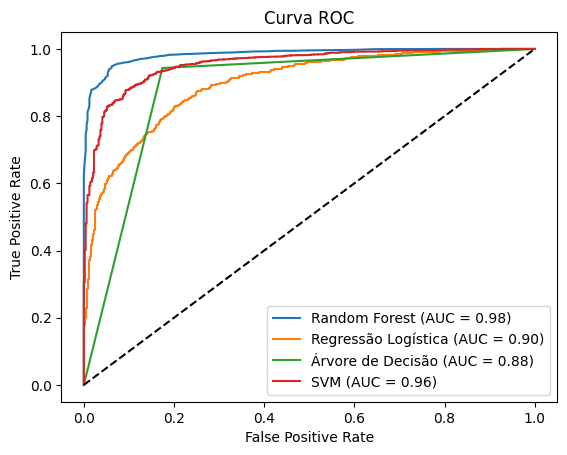

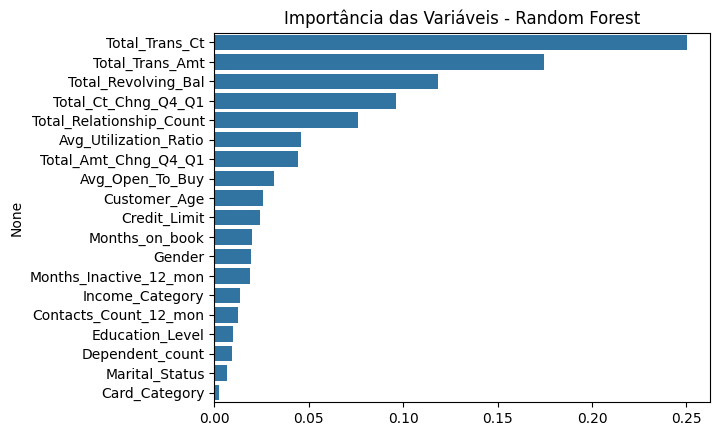

In [54]:
# =====================================
# Etapa 06) Criação, Treinamento e Avaliação do Modelo
# =====================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Modelos
modelos = {
    "Random Forest": RandomForestClassifier(),
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "Árvore de Decisão": DecisionTreeClassifier(),
    "SVM": SVC(probability=True)
}

# Avaliação dos modelos
for nome, modelo in modelos.items():
    modelo.fit(X_res, y_res)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]
    
    print(f"\nModelo: {nome}")
    print(classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_prob))

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{nome} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

# Importância das Features com Random Forest
importances = modelos["Random Forest"].feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Importância das Variáveis - Random Forest")
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.show()

✅ 1. Random Forest
Accuracy: 95% | AUC: 0.98

Muito equilibrado: precisão e recall altíssimos para ambas as classes.

Classe 0 (clientes que ficaram): recall de 88% e precisão de 84%.

Classe 1 (clientes que saíram): recall de 97% e precisão de 98%.

💡 Conclusão: O modelo que melhor equilibra acerto para os dois grupos. E ainda com AUC excelente. Ideal para ação de retenção, pois consegue identificar quem está saindo sem gerar muito falso positivo.


🟡 2. Regressão Logística
Accuracy: 84% | AUC: 0.89

Muito bom em identificar quem vai sair (recall 86%), mas ruim em quem fica (precision 51%).

Muitos falsos positivos: ou seja, prevê churn mesmo quando o cliente não iria sair.

AUC abaixo de 0.90.

💡 Conclusão: Serve para alertar sobre possíveis saídas, mas gera muito alarme falso, o que pode ser caro ou irritante para ações de retenção.


🟠 3. Árvore de Decisão
Accuracy: 92% | AUC: 0.88

Um meio-termo entre Random Forest e Regressão Logística.

Performance razoável, mas inferior à Random Forest.

Pode estar mais propensa a overfitting, principalmente com SMOTE.

💡 Conclusão: Útil para explicar decisões (pela interpretabilidade), mas perde em desempenho para Random Forest.


🔵 4. SVM (Support Vector Machine)
Accuracy: 92% | AUC: 0.95

Performance próxima da Random Forest.

Precision e recall muito bons, principalmente para quem sai.

Porém, SVM é menos interpretável e mais demorado para treinar, especialmente com grandes bases.

💡 Conclusão: Um excelente modelo preditivo, mas com menos aplicabilidade prática se você precisar explicar decisões.



🥇 Modelo Recomendado: Random Forest
🎯 Por quê?

Melhor equilíbrio entre as classes;

Altíssimo AUC (0.98);

Ótima capacidade preditiva e interpretabilidade;

Permite ver importância das variáveis (feature importance);

Treinamento rápido e estável, mesmo com muitos dados.

Iniciando busca de hiperparâmetros...
Fitting 5 folds for each of 864 candidates, totalling 4320 fits

Melhores hiperparâmetros encontrados:
{'bootstrap': False, 'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Melhor score (F1-macro) na validação cruzada:
0.9322

Métricas no conjunto de teste:
Acurácia: 0.9645
Precisão: 0.9716
Recall: 0.9865
F1-Score: 0.9790
AUC-ROC: 0.9880

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       325
           1       0.97      0.99      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026



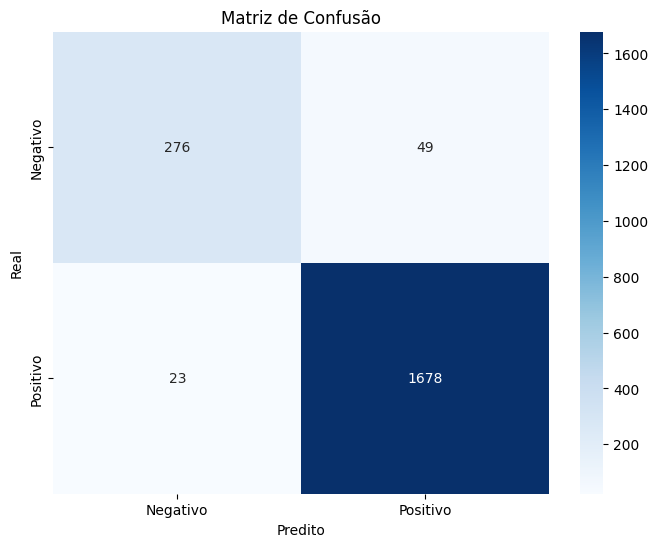

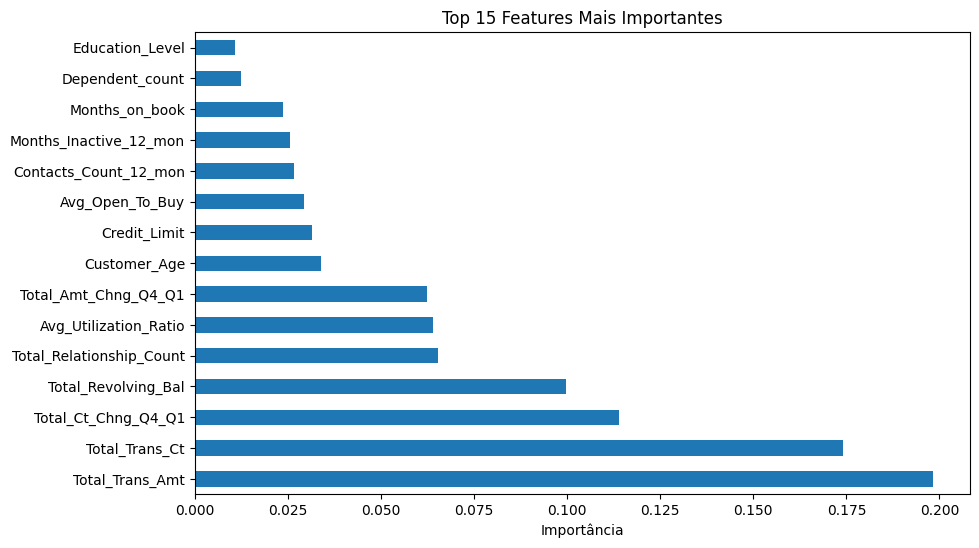


Modelo salvo como 'random_forest_otimizado.pkl'


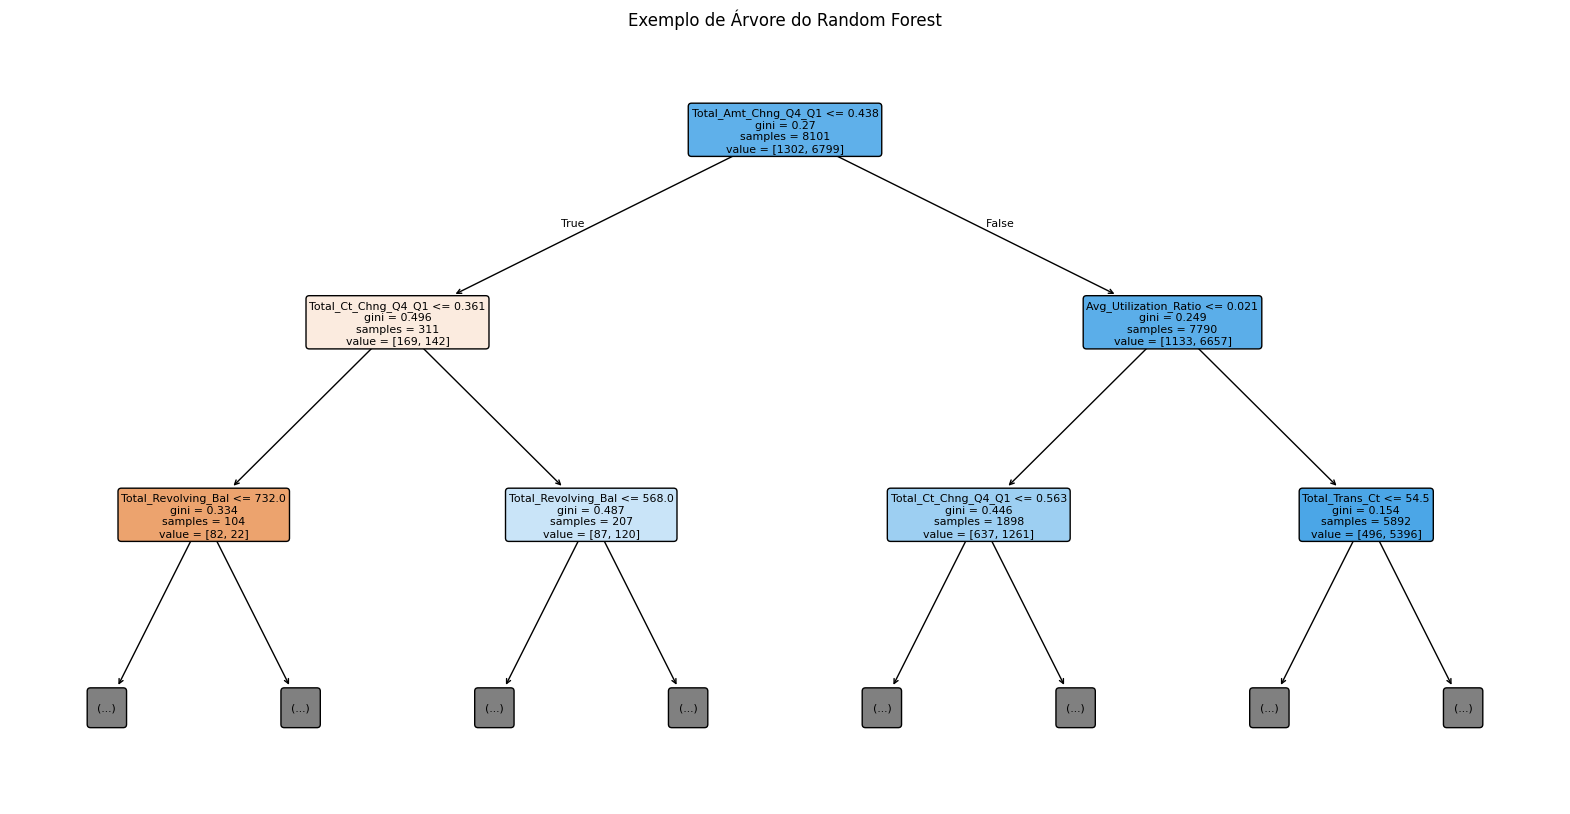

In [ ]:
#tunning dos Hiperparametros

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 1. Carregar o dataset
X = Churn.drop('Attrition_Flag', axis=1)        # Features
y = Churn['Attrition_Flag']                     # Variável alvo

# 2. Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Definir a grade de hiperparâmetros para busca
param_grid = {
    'n_estimators': [100, 200, 300],      # Número de árvores
    'max_depth': [None, 10, 15, 20],      # Profundidade máxima
    'min_samples_split': [2, 5, 10],      # Mínimo de amostras para dividir
    'min_samples_leaf': [1, 2, 4],        # Mínimo de amostras nas folhas
    'max_features': ['sqrt', 'log2'],     # Número de features para split
    'bootstrap': [True, False],           # Amostragem com/sem reposição
    'class_weight': [None, 'balanced']    # Para dados desbalanceados
}

# 4. Configurar o GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',                   # Métrica de avaliação
    cv=5,                                 # 5-fold cross-validation
    n_jobs=-1,                            # Usar todos os núcleos do CPU
    verbose=2                             # Mostrar logs detalhados
)

# 5. Executar a busca
print("Iniciando busca de hiperparâmetros...")
grid_search.fit(X_train, y_train)

# 6. Resultados da otimização
print("\nMelhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

print("\nMelhor score (F1-macro) na validação cruzada:")
print(f"{grid_search.best_score_:.4f}")

# 7. Avaliar o melhor modelo no conjunto de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nMétricas no conjunto de teste:")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

# 8. Relatório de classificação detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# 9. Matriz de confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo', 'Positivo'], 
            yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# 10. Importância das features
feature_importance = pd.Series(
    best_model.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.head(15).plot(kind='barh')
plt.title('Top 15 Features Mais Importantes')
plt.xlabel('Importância')
plt.show()

# 11. Salvar o modelo otimizado
joblib.dump(best_model, 'random_forest_otimizado.pkl')
print("\nModelo salvo como 'random_forest_otimizado.pkl'")

# 12.  Visualizar uma árvore do ensemble
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_model.estimators_[0], 
    feature_names=X.columns, 
    filled=True, 
    rounded=True,
    max_depth=2  # Limitar profundidade para visualização
)
plt.title("Exemplo de Árvore do Random Forest")
plt.show()